In [2]:
#Import
import pandas as pd
import numpy as np
import operator

#Train et test
from sklearn.model_selection import train_test_split

In [3]:
path_jeu1 = 'C:/Users/RetailAdmin/Desktop/PIP_2022NA/DATA1/DATA1/DONNEES_BRUTES/'

df_jeu1_toulouse = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_TOULOUSE.csv')
df_jeu1_languedoc = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_LANGUEDOC.csv')

In [ ]:
#affichage des variables ayant plus de 50% de données manquantes
for col in df_jeu1_toulouse:
    if round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2) > 50 : 
        print(col," :",round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2), "%")

In [13]:
df_jeu1_toulouse[df_jeu1_toulouse['TOP_FRAUDE'] == 1]['TOP_FRAUDE'].count()/df_jeu1_toulouse['TOP_FRAUDE'].count() * 100
#Pourcentage de fraudés dans le jeu de Toulouse complet

0.15379222218452807

In [23]:
df_nb_pret_noNaN = ~df_jeu1_toulouse['nb_pret_realise'].isnull()
df = df_jeu1_toulouse[df_nb_pret_noNaN]
df[df['TOP_FRAUDE'] == 1]['TOP_FRAUDE'].count()/df['TOP_FRAUDE'].count()*100

#Pourcentage de fraudés parmis les clients qui ont effectué des emprunts.

0.10775862068965517

In [30]:
df_jeu1_toulouse['TOP_FRAUDE'].corr(df_jeu1_toulouse['mt_dernier_revenu_declare'])

0.004890387892747801

In [24]:
df_jeu1_toulouse.corr(method='pearson')

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
TOP_FRAUDE,1.000000,0.705099,0.780979,0.014470,0.045369,0.002391,0.004879,0.014609,0.008225,-0.000365,...,0.010117,0.011717,0.007055,0.001557,0.001225,-0.000350,-0.000267,-0.000499,-0.000981,0.013340
TOP_FRAUDE_CARTE,0.705099,1.000000,0.195025,0.010328,0.030478,-0.002085,0.003071,0.009682,0.004040,-0.000257,...,0.009349,0.008958,0.004618,0.002429,0.000649,-0.000247,-0.000130,-0.000143,-0.001980,0.009327
TOP_FRAUDE_VIREMENT,0.780979,0.195025,1.000000,0.011333,0.039615,0.004693,0.005625,0.012092,0.007017,-0.000285,...,0.006794,0.008272,0.006037,0.001280,0.001337,-0.000274,-0.000169,-0.001043,-0.000055,0.010520
TOP_E_RELEVE,0.014470,0.010328,0.011333,1.000000,0.519339,-0.165482,0.041389,0.304546,0.323102,-0.004977,...,0.338408,0.198258,0.171866,0.052588,0.070271,-0.000279,-0.002437,0.028513,0.027212,0.332218
MESSAGERIE_WEB_ACTIVE,0.045369,0.030478,0.039615,0.519339,1.000000,-0.133586,0.043265,0.422371,0.217528,-0.007759,...,0.370388,0.320225,0.321087,0.053210,0.062439,-0.004049,0.001341,0.028018,0.027363,0.532797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt_reduc_ttc_M,-0.000350,-0.000247,-0.000274,-0.000279,-0.004049,0.001037,0.002011,-0.005520,-0.003133,-0.000068,...,-0.003903,0.006215,-0.002985,0.051813,0.010827,1.000000,-0.000068,-0.000208,0.000799,-0.010049
mt_reduc_ttc_M6,-0.000267,-0.000130,-0.000169,-0.002437,0.001341,-0.000641,0.004012,0.002290,0.002718,-0.000068,...,-0.003558,0.001484,-0.001616,0.010608,0.100863,-0.000068,1.000000,0.016063,0.004411,-0.004597
mt_rist_ttc_M,-0.000499,-0.000143,-0.001043,0.028513,0.028018,-0.021595,0.008537,0.022190,0.027114,0.008846,...,0.026353,0.013002,0.005717,0.208736,0.087235,-0.000208,0.016063,1.000000,0.119197,0.016204
mt_rist_ttc_M6,-0.000981,-0.001980,-0.000055,0.027212,0.027363,-0.020570,0.006966,0.021944,0.030382,0.002731,...,0.020099,0.008521,0.003955,0.057025,0.258538,0.000799,0.004411,0.119197,1.000000,0.014616


In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## by sum 
df=df_jeu1_toulouse.copy()
corr_matrix = df.corr().abs()

In [43]:
corr_matrix

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
TOP_FRAUDE,1.000000,0.705099,0.780979,0.014470,0.045369,0.002391,0.004879,0.014609,0.008225,0.000365,...,0.010117,0.011717,0.007055,0.001557,0.001225,0.000350,0.000267,0.000499,0.000981,0.013340
TOP_FRAUDE_CARTE,0.705099,1.000000,0.195025,0.010328,0.030478,0.002085,0.003071,0.009682,0.004040,0.000257,...,0.009349,0.008958,0.004618,0.002429,0.000649,0.000247,0.000130,0.000143,0.001980,0.009327
TOP_FRAUDE_VIREMENT,0.780979,0.195025,1.000000,0.011333,0.039615,0.004693,0.005625,0.012092,0.007017,0.000285,...,0.006794,0.008272,0.006037,0.001280,0.001337,0.000274,0.000169,0.001043,0.000055,0.010520
TOP_E_RELEVE,0.014470,0.010328,0.011333,1.000000,0.519339,0.165482,0.041389,0.304546,0.323102,0.004977,...,0.338408,0.198258,0.171866,0.052588,0.070271,0.000279,0.002437,0.028513,0.027212,0.332218
MESSAGERIE_WEB_ACTIVE,0.045369,0.030478,0.039615,0.519339,1.000000,0.133586,0.043265,0.422371,0.217528,0.007759,...,0.370388,0.320225,0.321087,0.053210,0.062439,0.004049,0.001341,0.028018,0.027363,0.532797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt_reduc_ttc_M,0.000350,0.000247,0.000274,0.000279,0.004049,0.001037,0.002011,0.005520,0.003133,0.000068,...,0.003903,0.006215,0.002985,0.051813,0.010827,1.000000,0.000068,0.000208,0.000799,0.010049
mt_reduc_ttc_M6,0.000267,0.000130,0.000169,0.002437,0.001341,0.000641,0.004012,0.002290,0.002718,0.000068,...,0.003558,0.001484,0.001616,0.010608,0.100863,0.000068,1.000000,0.016063,0.004411,0.004597
mt_rist_ttc_M,0.000499,0.000143,0.001043,0.028513,0.028018,0.021595,0.008537,0.022190,0.027114,0.008846,...,0.026353,0.013002,0.005717,0.208736,0.087235,0.000208,0.016063,1.000000,0.119197,0.016204
mt_rist_ttc_M6,0.000981,0.001980,0.000055,0.027212,0.027363,0.020570,0.006966,0.021944,0.030382,0.002731,...,0.020099,0.008521,0.003955,0.057025,0.258538,0.000799,0.004411,0.119197,1.000000,0.014616


In [49]:
corr_matrix['sum'] = corr_matrix[list(corr_matrix.columns)].sum(axis=1)
corr_matrix=corr_matrix.sort_values(by=['sum'],ascending=False)
## choix de 15 variables les plus corrélée
cor_15=corr_matrix[:15]## a changer 
col=cor_15.index
cor_15=cor_15[col]

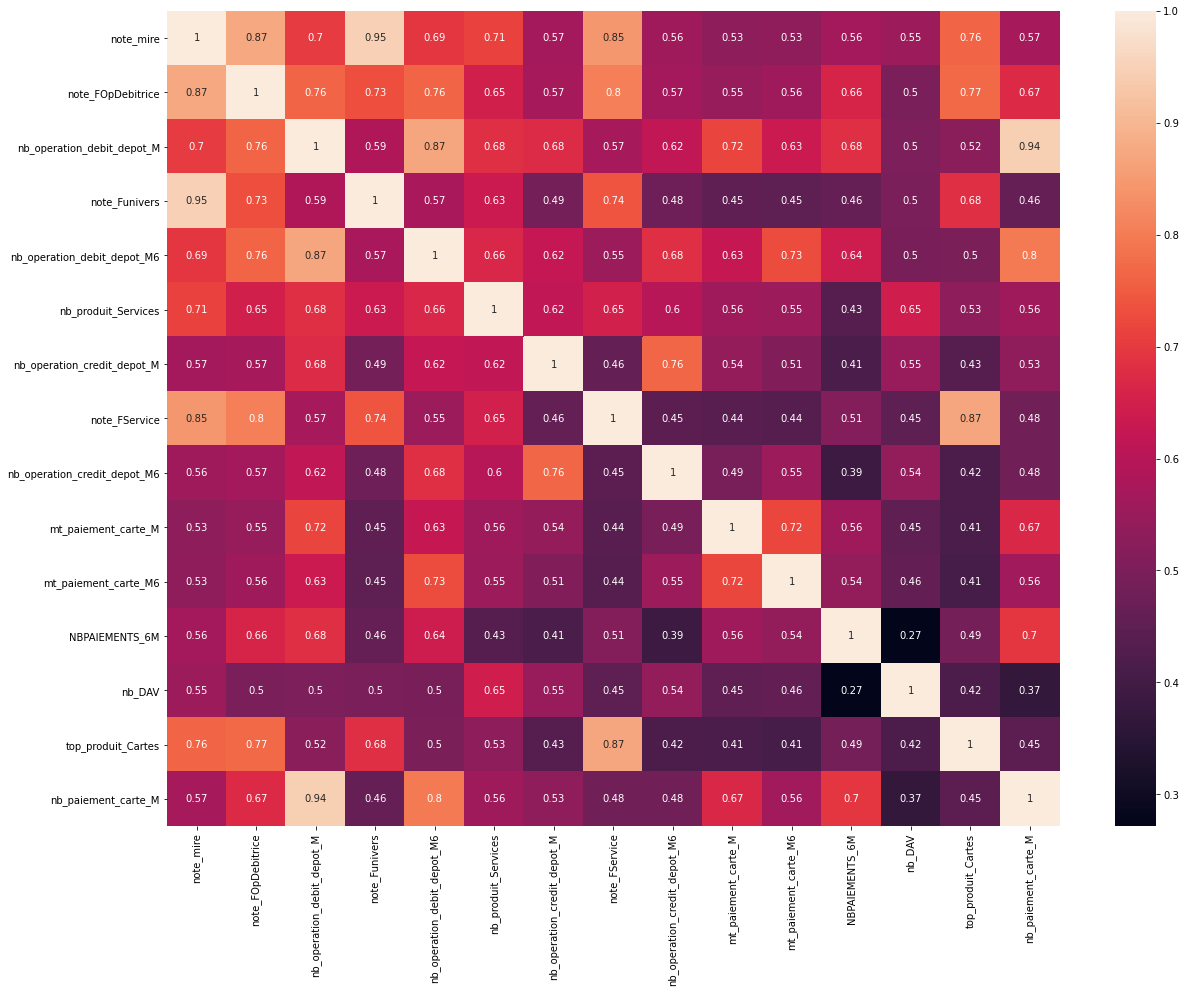

In [50]:
## plot matrice de corrélation
plt.subplots(figsize=(20,15))
sns.heatmap(cor_15, annot = True)
plt.show()